# CH12_Q3: K-means

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In this problem, you will perform K-means clustering manually, with K = 2, on a small example with n = 6 observations and p = 2 features. The observations are as follows.

In [2]:
# Data given in the problem
data = pd.DataFrame({
    'X1': [1, 1, 0, 5, 6, 4],
    'X2': [4, 3, 4, 1, 2, 0]
}, index=['Obs1', 'Obs2', 'Obs3', 'Obs4', 'Obs5', 'Obs6'])

### Part (a)

Plot the observations.

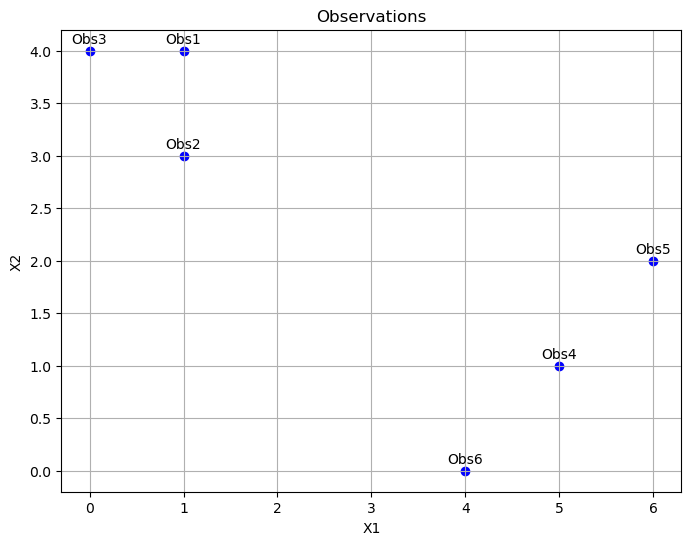

In [3]:
plt.figure(figsize=(8, 6))
plt.scatter(data['X1'], data['X2'], color='blue')

# Label the points
for i, txt in enumerate(data.index):
    plt.annotate(txt, (data['X1'].iloc[i], data['X2'].iloc[i]), textcoords="offset points", xytext=(0,5), ha='center')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Observations')
plt.grid(True)
plt.show()

### Part (b)

Randomly assign a cluster label to each observation. You can use the np.random.choice() function to do this. Report the cluster labels for each observation.

In [4]:
np.random.seed(42)  # For reproducibility
cluster_labels = np.random.choice([0, 1], size=len(data))

# Display the initial random cluster assignment
print("\nInitial cluster labels:\n", cluster_labels)


Initial cluster labels:
 [0 1 0 0 0 1]


### Part (c)

Compute the centroid for each cluster.

In [5]:
# Function to compute the centroid for each cluster using a dictionary approach
def compute_centroids(data, labels, num_clusters):
    centroids = {}
    for cluster in range(num_clusters):
        points = data[labels == cluster]
        if len(points) > 0:  # Only compute centroid if there are points in the cluster
            centroid = points.mean(axis=0)
            centroids[cluster] = centroid
    return centroids

num_clusters = 2  # Number of clusters (K=2)
centroids = compute_centroids(data, cluster_labels, num_clusters)

# Display the initial centroids for each cluster
print("\nInitial Centroid Coordinates:")
for cluster, centroid in centroids.items():
    print(f'Cluster {cluster}: X1 = {centroid["X1"]:.2f}, X2 = {centroid["X2"]:.2f}')


Initial Centroid Coordinates:
Cluster 0: X1 = 3.00, X2 = 2.75
Cluster 1: X1 = 2.50, X2 = 1.50


### Part (d)

Assign each observation to the centroid to which it is closest, in terms of Euclidean distance. Report the cluster labels for each observation.

In [6]:
# Function to assign points to the nearest centroid
def assign_clusters(data, centroids):
    distances = np.zeros((len(data), len(centroids)))
    for cluster, centroid in centroids.items():
        distances[:, cluster] = np.sqrt((data['X1'] - centroid['X1'])**2 + (data['X2'] - centroid['X2'])**2)
    return np.argmin(distances, axis=1)

# Assign each point to the nearest centroid
cluster_labels = assign_clusters(data, centroids)
print("\nCluster labels after reassignment:\n", cluster_labels)


Cluster labels after reassignment:
 [0 0 0 1 0 1]


### Part (e)

Repeat (c) and (d) until the answers obtained stop changing.

In [7]:
# Repeat steps (c) and (d) until convergence
while True:
    old_labels = cluster_labels.copy()
    centroids = compute_centroids(data, cluster_labels, num_clusters)
    cluster_labels = assign_clusters(data, centroids)
    if np.all(cluster_labels == old_labels):
        break

# Display the final centroids after convergence
print("\nFinal Centroid Coordinates:")
for cluster, centroid in centroids.items():
    print(f'Cluster {cluster}: X1 = {centroid["X1"]:.2f}, X2 = {centroid["X2"]:.2f}')

# Display the final cluster assignments
print("\nFinal Cluster Assignments:")
print(cluster_labels)


Final Centroid Coordinates:
Cluster 0: X1 = 0.67, X2 = 3.67
Cluster 1: X1 = 5.00, X2 = 1.00

Final Cluster Assignments:
[0 0 0 1 1 1]


### Part (f)

In your plot from (a), color the observations according to the cluster labels obtained.

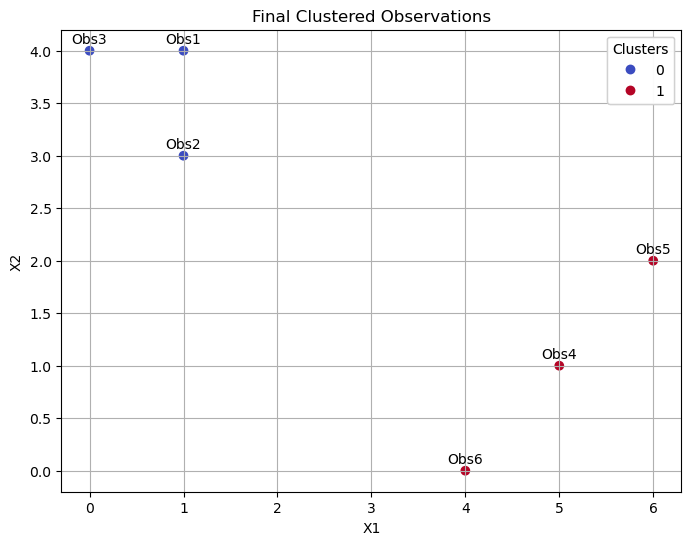

In [8]:
plt.figure(figsize=(8, 6))  # Adjusted figure size
scatter = plt.scatter(data['X1'], data['X2'], c=cluster_labels,cmap='coolwarm', label=cluster_labels)

for i, txt in enumerate(data.index):
    plt.annotate(txt, (data['X1'].iloc[i], data['X2'].iloc[i]), textcoords="offset points", xytext=(0,5), ha='center')

# Add labels, title, and legend
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Final Clustered Observations')
plt.grid(True)

# Add color legend for clusters
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

plt.show()